In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath("..")))
from CS224W_Project import *

In [2]:
# https://stackoverflow.com/questions/35569042/ssl-certificate-verify-failed-with-python3
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
from torch_geometric_temporal.dataset import METRLADatasetLoader, PemsBayDatasetLoader

In [5]:
from CS224W_Project.src.utils.data_utils import *

## Set up

In [6]:
model = "dcrnn"
dataset = "metr"
df = TimeSeriesDataset(METRLADatasetLoader(), free_mem_after_data_split=False)

In [7]:
df._x.shape

torch.Size([34249, 207, 2, 12])

In [10]:
7192249 / (34249 * 207 * 2 * 12)

0.042270290435739884

In [8]:
torch.sum(torch.isnan(df._x)).item()

7192249

## Plot training losses

In [15]:
losses = {
    mode: np.load(os.path.join(RESULTS_PATH, model, dataset, f"loss_{mode}.npy"))
    for mode in {"train", "valid"}
}

In [17]:
losses["valid"]

array([0.74020708, 0.71234705, 0.64423673, 0.55168826, 0.5537425 ,
       0.48437273, 0.4903137 , 0.4488199 , 0.43137402, 0.41697885,
       0.40989329, 0.40075906, 0.37438924, 0.35609176, 0.33667178,
       0.32953002, 0.31855408, 0.30220876, 0.28772473, 0.2801104 ,
       0.27879214, 0.2764327 , 0.27399711, 0.27223726, 0.27123034,
       0.27035755, 0.26920012, 0.26790526, 0.26700623, 0.26650515,
       0.26641391, 0.26626205, 0.26606028, 0.26582201, 0.26556169,
       0.26529354, 0.26503106, 0.26478576, 0.26456454, 0.26436862,
       0.26435012, 0.26433145, 0.2643126 , 0.26429359, 0.26427445,
       0.26425518, 0.26423583, 0.26421642, 0.26419699, 0.26417755,
       0.26417561, 0.26417366, 0.2641717 , 0.26416974, 0.26416777,
       0.26416581, 0.26416384, 0.26416188, 0.26415992, 0.26415796,
       0.26415599, 0.26415403, 0.26415208, 0.26415012, 0.26414817,
       0.26414622, 0.26414428, 0.26414233, 0.26414039, 0.26413846,
       0.26413652, 0.2641346 , 0.26413267, 0.26413074, 0.26412

## Plot forecasts

In [14]:
y = torch.tensor(out["targets"][:32, :, :])
y_norm = df.scaler.normalize(y, feature_idx=0)

In [16]:
y[0, 0, :]

tensor([70.0000, 70.2000, 71.2000, 72.7000, 71.9000, 72.0000, 72.0000, 70.6000,
        70.7000, 71.8000, 69.1000, 69.5000])

In [17]:
df.scaler.unnormalize(y_norm, feature_idx=0)[0, 0, :]

tensor([70.0000, 70.2000, 71.2000, 72.7000, 71.9000, 72.0000, 72.0000, 70.6000,
        70.7000, 71.8000, 69.1000, 69.5000])

In [8]:
out = np.load(os.path.join(RESULTS_PATH, "forecasts", f"{model}_{dataset}.npz"))

In [9]:
out["targets"].shape, out["forecasts"].shape

((6850, 207, 12), (6850, 207, 12))

In [10]:
targets = np.concatenate((out["targets"][:, :, 0], out["targets"][-11:, :, -1]))
targets.shape

(6861, 207)

In [11]:
h = 1
node_idx = 0
forecasts = out["forecasts"][:, node_idx, h - 1]
forecasts.shape

(6850,)

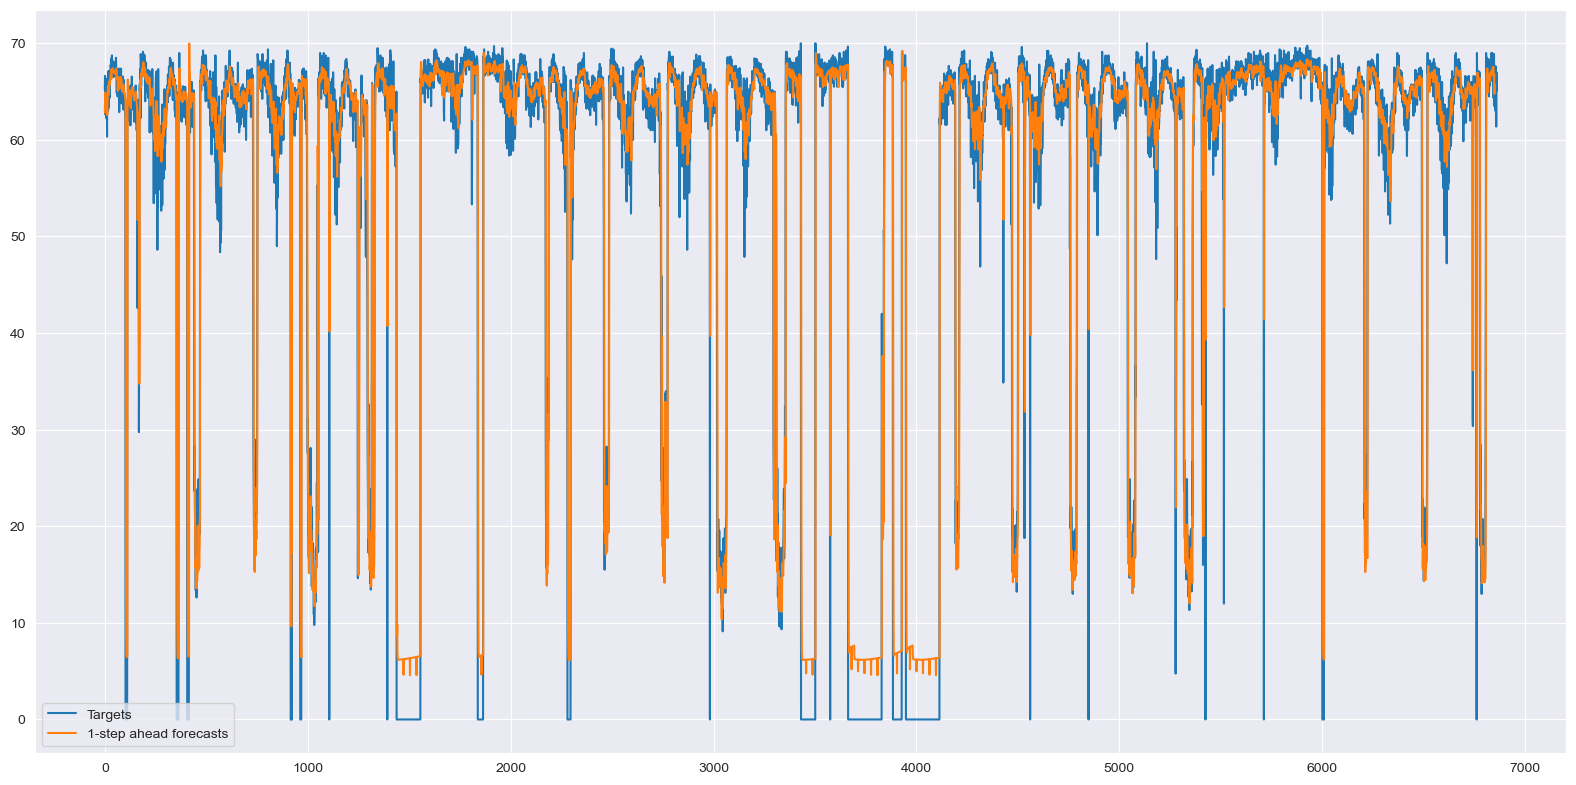

In [12]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
plt.tight_layout()
ax.plot(range(targets.shape[0]), targets[:, node_idx], label="Targets")
ax.plot(range(forecasts.shape[0]), forecasts, label=f"{h}-step ahead forecasts")
ax.legend(loc=3)

In [50]:
out["targets"][:, node_idx, h - 1][:12]

array([70. , 70.2, 71.2, 72.7, 71.9, 72. , 72. , 70.6, 70.7, 71.8, 69.1,
       69.5], dtype=float32)

In [ ]:
hs = (1, 3, 12)